###### Help to create an image dataset to be used by the AI team to build an image classifier data. Profile images of people are given.
1. You are expected to curate the bounding box co-ordinates for each image. These are also called annotations.
2. This task can be done using manual methods where you need to open each image and note the coordinates where the face located
[though it is not recommended]. This task can be easily done using an automation where you need to input the image in the
automation and the output is the coordinates of the face detected from the image. [this is highly recommended]. Also highlight how
many faces detected in each image.

- Importing Libraries

In [82]:
# import libraries
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
image_path = 'F:\\GreatLearning\\AI\\ComputerVision\\Project2\\Part2_Face\\training_images\\real_00007.jpg'
im = cv2.imread(image_path)
#im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#plt.imshow(im)
#plt.show()
im.shape

(600, 600, 3)

In [83]:


faces, confidences = cv.detect_face(im)

# loop through detected faces and add bounding box
print(len(faces))

for face,conf in zip(faces,confidences):
    if(conf>0.9):
        #print(face,conf)
        (startX,startY) = face[0],face[1]
        (endX,endY) = face[2],face[3]
        # draw rectangle over face
        
        #we were getting multiple bouding boxes for rgb , get the bounding box of image for one color only
        #where all coordinates are inside size
        #putting condition to map the coordinates which are inside the image size
        if(endX<im.shape[0] & endY<im.shape[1]):
            cv2.rectangle(im, (startX,startY), (endX,endY), (0,255,0), 2)
            font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(im, str(conf), (startX +6 , startY-6 ), font, 0.5, (0, 0, 255), 1)


            # display output        
            cv2.imshow("face_detection", im)
            cv2.waitKey()

            # save output
            #cv2.imwrite("face_detection.jpg", image)

            # release resources
            cv2.destroyAllWindows()

3
[170, 71, 484, 559] 0.99864775
[366, 263, 689, 763] 0.99747926


- Putting the image and bounding box together to see the accuracies and confidence level of model

(600, 600, 3)
9
x: 107 ,y: 52 h: 528 w: 401
x: 107 ,y: 52 endX: 508 endY: 580
1


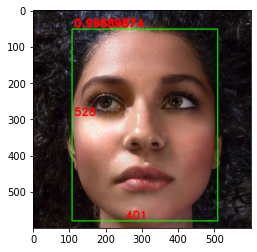

In [8]:
# import libraries
import os
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
image_path = 'F:\\GreatLearning\\AI\\ComputerVision\\Project2\\Part2_Face\\training_images\\real_00006.jpg'
im = cv2.imread(image_path)
#im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#plt.imshow(im)
#plt.show()
print(im.shape)

#we were getting 6 images for rgb , get the bounding box of image for one color only
#where all coordinates are inside size
faces, confidences = cv.detect_face(im)
# loop through detected faces and add bounding box
print(len(faces))
face_count=0
fileNames=[]
for face,conf in zip(faces,confidences):
    #if(conf<0.9):
        #print(face,conf)
        #break
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    # draw rectangle over face
    
    #we were getting multiple bouding boxes for rgb , get the bounding box of image for one color only
    #where all coordinates are inside size
    #putting condition to map the coordinates which are inside the image size
    if(endX<im.shape[0] & endY<im.shape[1]):
        face_count+=1
        head, tail = os.path.split(image_path)
        fileNames.append(tail)
        cv2.rectangle(im, (startX,startY), (endX,endY), (0,255,0), 2)
        font = cv2.FONT_HERSHEY_DUPLEX
        x=startX
        y=startY
        w=endX-startX
        h=endY-startY
        cv2.putText(im, str(conf), (startX +6 , startY-6 ), font, 1, (0, 0, 255), 3)
        cv2.putText(im, str(endY - startY), (startX +6 , int(endY/2) ), font, 1, (0, 0, 255), 2)
        cv2.putText(im, str(endX - startX), (int(endX/2) , endY-6 ), font, 1, (0, 0, 255), 2)
        print('x:',x,',y:',y,'h:',h,'w:',w)
        print('x:',startX,',y:',startY,'endX:',endX,'endY:',endY)
        print(face_count)

# display output        
cv2.imshow("face_detection", im)
cv2.waitKey()

# save output
cv2.imwrite("F:\\GreatLearning\\AI\\ComputerVision\\Project2\\Part2_Face\\Annotated_Faces\\p1.jpg", im)

# release resources
cv2.destroyAllWindows()

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)

In [5]:
import pandas as pd

d1=[]
cols=['x','y','w','h','Total_Faces','Image_Name']
d1.append([x,y,w,h,face_count,fileNames[0]])
face_cord = pd.DataFrame(data=d1,columns=cols)
face_cord

,x,y,w,h,Total_Faces,Image_Name
0,107,52,401,528,1,real_00006.jpg


#### Putting all details captured above in a function 

In [1]:
import os
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
import pandas as pd
container_path = 'F:\\GreatLearning\\AI\\ComputerVision\\Project2\\Part2_Face\\temp'
train_folder= 'F:\\GreatLearning\\AI\\ComputerVision\\Project2\\Part2_Face\\training_images'
res_path= 'F:\\GreatLearning\\AI\\ComputerVision\\Project2\\Part2_Face\\Annotated_Faces'

if not os.path.exists(res_path):
    os.makedirs(res_path)

cols=['x','y','w','h','Total_Faces','Image_Name']

face_cord = pd.DataFrame(columns=cols)
face_cord

,x,y,w,h,Total_Faces,Image_Name


In [8]:
def face_annotations(container_path):
    image_dir = Path(container_path)
    face_cord = pd.DataFrame(columns=cols)
    
    for file in image_dir.iterdir():
        #print(file)
        head, tail = os.path.split(file)
        #print(tail)
        #print(os.path.join(res_path, tail))
        im = cv2.imread(str(file))
        

        faces, confidences = cv.detect_face(im)
        face_count=0
        fileNames=[]
        d1=[]
        for face,conf in zip(faces,confidences):
            
            (startX,startY) = face[0],face[1]
            (endX,endY) = face[2],face[3]

            if(endX<im.shape[0] & endY<im.shape[1]):
                
                face_count+=1
                cv2.rectangle(im, (startX,startY), (endX,endY), (0,255,0), 2)
                font = cv2.FONT_HERSHEY_DUPLEX
                x=startX
                y=startY
                w=endX-startX
                h=endY-startY
                #print('x:',x,',y:',y,'h:',h,'w:',w, 'Face Count:',face_count)
                d1.append([x,y,w,h,face_count,tail])
                df_face = pd.DataFrame(data=d1,columns=cols)
                print(df_face)
                #cv2.imshow("face_detection", im)
                #cv2.waitKey()
                #cv2.destroyAllWindows()
                
                cv2.imwrite(os.path.join(res_path, tail), im)
                im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
                plt.imshow(im)
                
                face_cord=face_cord.append(df_face)
    return face_cord    


###### Containner path only has 3 images for testing the model

     x   y    w    h  Total_Faces      Image_Name
0  146  57  370  519            1  real_00001.jpg
     x    y    w    h  Total_Faces      Image_Name
0  139  133  324  450            1  real_00002.jpg
     x   y    w    h  Total_Faces      Image_Name
0  117  88  320  462            1  real_00003.jpg


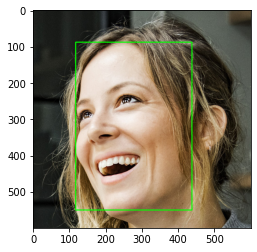

In [9]:
res=face_annotations(container_path)

In [4]:
res

,x,y,w,h,Total_Faces,Image_Name
0,146,57,370,519,1,real_00001.jpg
0,139,133,324,450,1,real_00002.jpg
0,117,88,320,462,1,real_00003.jpg


###### Implementing on whole train folder

In [5]:
df_AnotatedFace=face_annotations(train_folder)

     x   y    w    h  Total_Faces      Image_Name
0  146  57  370  519            1  real_00001.jpg
     x    y    w    h  Total_Faces      Image_Name
0  139  133  324  450            1  real_00002.jpg
     x   y    w    h  Total_Faces      Image_Name
0  117  88  320  462            1  real_00003.jpg
     x    y    w    h  Total_Faces      Image_Name
0  133  152  320  404            1  real_00004.jpg
     x    y    w    h  Total_Faces      Image_Name
0  123  106  298  450            1  real_00005.jpg
     x   y    w    h  Total_Faces      Image_Name
0  107  52  401  528            1  real_00006.jpg
     x   y    w    h  Total_Faces      Image_Name
0  170  71  314  488            1  real_00007.jpg
     x    y    w    h  Total_Faces      Image_Name
0  147  124  305  435            1  real_00008.jpg
     x  y    w    h  Total_Faces      Image_Name
0  132  5  372  549            1  real_00009.jpg
     x   y    w    h  Total_Faces      Image_Name
0  106  62  368  510            1  real_0001

     x   y    w    h  Total_Faces      Image_Name
0  105  75  418  506            1  real_00088.jpg
    x    y    w    h  Total_Faces      Image_Name
0  91  112  401  476            1  real_00089.jpg
     x   y    w    h  Total_Faces      Image_Name
0  101  28  404  544            1  real_00090.jpg
     x    y    w    h  Total_Faces      Image_Name
0  108  110  357  465            1  real_00092.jpg
     x    y    w    h  Total_Faces      Image_Name
0  114  128  397  457            1  real_00093.jpg
     x    y    w    h  Total_Faces      Image_Name
0  101  128  372  445            1  real_00095.jpg
     x   y    w    h  Total_Faces      Image_Name
0  128  76  378  508            1  real_00096.jpg
     x   y    w    h  Total_Faces      Image_Name
0  101  94  449  490            1  real_00097.jpg
     x   y    w    h  Total_Faces      Image_Name
0  124  58  373  524            1  real_00098.jpg
    x   y    w    h  Total_Faces      Image_Name
0  85  47  490  564            1  real_00099.

     x   y    w    h  Total_Faces      Image_Name
0  102  71  355  493            1  real_00178.jpg
     x    y    w    h  Total_Faces      Image_Name
0  180  154  258  401            1  real_00179.jpg
     x    y    w    h  Total_Faces      Image_Name
0  116  154  376  437            1  real_00180.jpg
    x    y    w    h  Total_Faces      Image_Name
0  95  139  396  440            1  real_00181.jpg
     x    y    w    h  Total_Faces      Image_Name
0  141  173  325  406            1  real_00182.jpg
    x   y    w    h  Total_Faces      Image_Name
0  80  97  405  492            1  real_00183.jpg
     x    y    w    h  Total_Faces      Image_Name
0  160  158  282  411            1  real_00184.jpg
     x    y    w    h  Total_Faces      Image_Name
0  125  136  328  438            1  real_00185.jpg
     x   y    w    h  Total_Faces      Image_Name
0  156  78  339  497            1  real_00186.jpg
     x    y    w    h  Total_Faces      Image_Name
0  140  115  310  460            1  real_

     x    y    w    h  Total_Faces      Image_Name
0  128  128  339  420            1  real_00268.jpg
    x   y    w    h  Total_Faces      Image_Name
0  76  22  485  555            1  real_00269.jpg
     x    y    w    h  Total_Faces      Image_Name
0  144  146  319  440            1  real_00270.jpg
     x   y    w    h  Total_Faces      Image_Name
0  107  72  362  494            1  real_00271.jpg
    x   y    w    h  Total_Faces      Image_Name
0  73  57  434  487            1  real_00272.jpg
     x    y    w    h  Total_Faces      Image_Name
0  128  118  299  440            1  real_00273.jpg
     x    y    w    h  Total_Faces      Image_Name
0  119  144  317  434            1  real_00274.jpg
     x    y    w    h  Total_Faces      Image_Name
0  101  104  428  478            1  real_00275.jpg
     x    y    w    h  Total_Faces      Image_Name
0  133  140  263  410            1  real_00276.jpg
     x    y    w    h  Total_Faces      Image_Name
0  184  157  276  419            1  real_

     x    y    w    h  Total_Faces      Image_Name
0  161  131  322  441            1  real_00354.jpg
     x    y    w    h  Total_Faces      Image_Name
0  124  127  349  447            1  real_00355.jpg
    x    y    w    h  Total_Faces      Image_Name
0  62  138  456  447            1  real_00356.jpg
     x    y    w    h  Total_Faces      Image_Name
0  150  154  291  400            1  real_00357.jpg
     x    y    w    h  Total_Faces      Image_Name
0  108  148  382  442            1  real_00358.jpg
     x    y    w    h  Total_Faces      Image_Name
0  133  112  355  458            1  real_00359.jpg
     x    y    w    h  Total_Faces      Image_Name
0  112  113  344  464            1  real_00360.jpg
     x   y    w    h  Total_Faces      Image_Name
0  118  70  345  499            1  real_00361.jpg
     x    y    w    h  Total_Faces      Image_Name
0  172  172  293  387            1  real_00362.jpg
     x    y    w    h  Total_Faces      Image_Name
0  155  137  337  445            1 

     x    y    w    h  Total_Faces      Image_Name
0  124  124  391  398            1  real_00443.jpg
    x  y    w    h  Total_Faces      Image_Name
0  95  4  403  576            1  real_00444.jpg
     x   y    w    h  Total_Faces      Image_Name
0  124  71  379  507            1  real_00445.jpg
     x   y    w    h  Total_Faces      Image_Name
0  118  92  340  466            1  real_00446.jpg
     x   y    w    h  Total_Faces      Image_Name
0  118  62  405  514            1  real_00447.jpg
     x    y    w    h  Total_Faces      Image_Name
0  152  128  309  454            1  real_00448.jpg
     x    y    w    h  Total_Faces      Image_Name
0  114  119  341  468            1  real_00449.jpg
     x   y    w    h  Total_Faces      Image_Name
0  148  88  315  496            1  real_00450.jpg
     x    y    w    h  Total_Faces      Image_Name
0  162  135  294  415            1  real_00451.jpg
     x   y    w    h  Total_Faces      Image_Name
0  101  94  346  477            1  real_00452.

     x    y    w    h  Total_Faces      Image_Name
0  130  111  354  463            1  real_00526.jpg
     x   y    w    h  Total_Faces      Image_Name
0  126  81  330  484            1  real_00527.jpg
     x   y    w    h  Total_Faces      Image_Name
0  136  57  380  508            1  real_00528.jpg
     x    y    w    h  Total_Faces      Image_Name
0  134  134  332  445            1  real_00529.jpg
     x   y    w    h  Total_Faces      Image_Name
0  163  73  350  510            1  real_00530.jpg
     x    y    w    h  Total_Faces      Image_Name
0  157  144  332  425            1  real_00531.jpg
     x    y    w    h  Total_Faces      Image_Name
0  131  143  318  440            1  real_00532.jpg
     x   y    w    h  Total_Faces      Image_Name
0  112  97  372  469            1  real_00533.jpg
     x    y    w    h  Total_Faces      Image_Name
0  156  161  307  413            1  real_00534.jpg
     x    y    w    h  Total_Faces      Image_Name
0  156  118  312  456            1  rea

     x    y    w    h  Total_Faces      Image_Name
0  146  145  288  413            1  real_00614.jpg
    x   y    w    h  Total_Faces      Image_Name
0  87  81  396  496            1  real_00615.jpg
     x    y    w    h  Total_Faces      Image_Name
0  155  139  278  414            1  real_00616.jpg
     x    y    w    h  Total_Faces      Image_Name
0  134  134  307  437            1  real_00617.jpg
     x    y    w    h  Total_Faces      Image_Name
0  132  126  304  433            1  real_00618.jpg
     x    y    w    h  Total_Faces      Image_Name
0  139  141  316  415            1  real_00619.jpg
     x    y    w    h  Total_Faces      Image_Name
0  121  141  310  445            1  real_00620.jpg
     x    y    w    h  Total_Faces      Image_Name
0  121  148  334  421            1  real_00621.jpg
    x   y    w    h  Total_Faces      Image_Name
0  79  92  424  495            1  real_00622.jpg
    x   y    w    h  Total_Faces      Image_Name
0  65  91  436  481            1  real_00

     x    y    w    h  Total_Faces      Image_Name
0  128  167  307  404            1  real_00710.jpg
     x   y    w    h  Total_Faces      Image_Name
0  110  37  387  509            1  real_00711.jpg
     x    y    w    h  Total_Faces      Image_Name
0  169  138  286  438            1  real_00712.jpg
     x    y    w    h  Total_Faces      Image_Name
0  134  100  347  443            1  real_00713.jpg
     x    y    w    h  Total_Faces      Image_Name
0  127  112  316  451            1  real_00714.jpg
     x   y    w    h  Total_Faces      Image_Name
0  113  89  347  468            1  real_00715.jpg
     x   y    w    h  Total_Faces      Image_Name
0  161  75  356  460            1  real_00716.jpg
     x    y    w    h  Total_Faces      Image_Name
0  145  111  355  448            1  real_00717.jpg
     x   y    w    h  Total_Faces      Image_Name
0  207  74  310  480            1  real_00718.jpg
     x    y    w    h  Total_Faces      Image_Name
0  141  169  303  413            1  rea

     x   y    w    h  Total_Faces      Image_Name
0  143  92  361  473            1  real_00796.jpg
     x   y    w    h  Total_Faces      Image_Name
0  131  89  339  465            1  real_00797.jpg
    x   y    w    h  Total_Faces      Image_Name
0  97  32  407  527            1  real_00798.jpg
    x   y    w    h  Total_Faces      Image_Name
0  93  66  416  503            1  real_00799.jpg
    x   y    w    h  Total_Faces      Image_Name
0  90  59  390  488            1  real_00800.jpg
     x    y    w    h  Total_Faces      Image_Name
0  146  113  357  453            1  real_00802.jpg
     x    y    w    h  Total_Faces      Image_Name
0  116  168  346  401            1  real_00804.jpg
     x   y    w    h  Total_Faces      Image_Name
0  132  83  340  484            1  real_00805.jpg
     x    y    w    h  Total_Faces      Image_Name
0  141  144  296  432            1  real_00806.jpg
     x   y    w    h  Total_Faces      Image_Name
0  120  93  359  482            1  real_00807.jpg


     x    y    w    h  Total_Faces      Image_Name
0  139  150  312  430            1  real_00889.jpg
    x    y    w    h  Total_Faces      Image_Name
0  93  108  380  455            1  real_00890.jpg
     x    y    w    h  Total_Faces      Image_Name
0  144  128  311  422            1  real_00891.jpg
    x   y    w    h  Total_Faces      Image_Name
0  95  56  384  512            1  real_00892.jpg
     x    y    w    h  Total_Faces      Image_Name
0  164  105  333  472            1  real_00893.jpg
    x   y    w    h  Total_Faces      Image_Name
0  89  29  413  530            1  real_00895.jpg
     x   y    w    h  Total_Faces      Image_Name
0  107  72  387  482            1  real_00896.jpg
     x    y    w    h  Total_Faces      Image_Name
0  103  127  328  446            1  real_00897.jpg
     x    y    w    h  Total_Faces      Image_Name
0  156  161  296  412            1  real_00898.jpg
    x    y    w    h  Total_Faces      Image_Name
0  95  125  351  454            1  real_0089

     x    y    w    h  Total_Faces      Image_Name
0  136  104  388  490            1  real_00988.jpg
     x    y    w    h  Total_Faces      Image_Name
0  120  133  327  419            1  real_00989.jpg
     x    y    w    h  Total_Faces      Image_Name
0  147  159  300  407            1  real_00990.jpg
     x    y    w    h  Total_Faces      Image_Name
0  104  125  317  418            1  real_00991.jpg
     x   y    w    h  Total_Faces      Image_Name
0  155  76  377  500            1  real_00992.jpg
     x   y    w    h  Total_Faces      Image_Name
0  109  44  407  519            1  real_00993.jpg
     x  y    w    h  Total_Faces      Image_Name
0  108  9  441  571            1  real_00994.jpg
    x   y    w    h  Total_Faces      Image_Name
0  89  14  357  554            1  real_00995.jpg
    x   y    w    h  Total_Faces      Image_Name
0  97  89  372  483            1  real_00997.jpg
     x   y    w    h  Total_Faces      Image_Name
0  119  75  320  498            1  real_00998.jp

     x   y    w    h  Total_Faces      Image_Name
0  123  84  357  471            1  real_01074.jpg
     x    y    w    h  Total_Faces      Image_Name
0  140  134  304  434            1  real_01075.jpg
     x    y    w    h  Total_Faces      Image_Name
0  115  122  359  443            1  real_01076.jpg
     x    y    w    h  Total_Faces      Image_Name
0  118  123  323  466            1  real_01077.jpg
     x   y    w    h  Total_Faces      Image_Name
0  111  84  403  477            1  real_01078.jpg
     x   y    w    h  Total_Faces      Image_Name
0  134  66  359  488            1  real_01079.jpg
     x   y    w    h  Total_Faces      Image_Name
0  110  94  342  461            1  real_01080.jpg


- We can clearly notice we are getting the expected x,y,w,h and total faces details

In [6]:
df_AnotatedFace.reset_index(drop=True, inplace=True)

In [7]:
df_AnotatedFace.to_csv("submission_AnnotatedFace.csv",index=False)

- While trying out from different approaches, with casscadeclassifier we are able to capture face but it was not able to identify all the images with different poses. With different image having just one side of face with lot of features or objects in front of face are misleading the model forcreating the bounding boxes 
- with cvlib when we pass a image with RGB layers, we were getting mulitple predictions for faces as the model is predicting for multiple layers in a single big frame. We can get around tht with picking the predictions with high confidence and which are within the images coordinates. 
- We have huge variations of face images from different
    - Age group
        - We have face images from kids to aged/seasoned actors
        - with different ages we can see the face has different features with hair/eyes/hair patterns
    - Gender
        - Male and female images are different with different features
    - Facial Expression
        - Facial expressions are different from picture to picture
    - Poses
        - Many poses are different, with different angles of faces
    - Ligting/illuination conditions
        - light conditions are very diff

In [ ]:
#Referernces

- https://towardsdatascience.com/image-data-labelling-and-annotation-everything-you-need-to-know-86ede6c684b1
- 


- https://github.com/robinreni96/Automatic-Face-Detection-Annotation-and-Preprocessing
- https://automaticaddison.com/how-to-annotate-images-using-opencv/
- https://github.com/AlvaroCavalcante/auto_annotate/blob/master/scripts/detection_images.py
- https://medium.com/analytics-vidhya/auto-annotate-images-for-tensorflow-object-detection-19b59f31c4d9


- https://github.com/arunponnusamy/cvlib
